In [1]:
from __future__ import print_function
import astropy
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sys.path.pop(0)
%matplotlib inline

#loops over all, plots  orders

# Some barycorrpy checks 

In [2]:
import barycorrpy
barycorrpy.__version__

'0.3.4'

In [3]:
# Running sample script - this has to print:
# ***********SUCCESS**************
# All barycentric correction velocities match expected values to 1 cm/s
from barycorrpy import sample_script 
sample_script.run_sample() 

***********SUCCESS**************
All barycentric correction velocities match expected values to 1 cm/s



((array([15403.95083409]),
  [['Warning: Assuming input time is in UTC JD. Pass astropy Time object to avoid this warning.'],
   'Following are the stellar positional parameters being used - ',
   {'ra': 26.021364586713265,
    'dec': -15.939555724635493,
    'pmra': -1721.05,
    'pmdec': 854.16,
    'px': 273.96,
    'epoch': 2448349.0625},
   [],
   []],
  1),
 (array([15403.96081446]),
  ['Warning: Taking observatory coordinates from Astropy Observatory database. Verify precision. Latitude = -30.165278  Longitude = -70.815000  Altitude = 2215.000000',
   'Following are the stellar positional parameters being used - ',
   {'ra': 26.021364586713265,
    'dec': -15.939555724635493,
    'pmra': -1721.05,
    'pmdec': 854.16,
    'px': 273.96,
    'epoch': 2448349.0625},
   [],
   []],
  1),
 (array([15407.48590935, 15407.47225001, 15407.45859206]),
  [['Warning: Assuming input time is in UTC JD. Pass astropy Time object to avoid this warning.'],
   'Following are the stellar positional

# Import our package

In [4]:
import hpfspec
hpfspec

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


<module 'hpfspec' from '/home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/__init__.py'>

In [5]:
# Lets read in an HPF spectrum
# The function reads in the object name from the header
# If ccf_redshift is true, then it will redshift the wavelength to the stellar frame
# i.e., this takes out the absolute redshift estimated by calculating a CCF

#H = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T013939_R01.optimal.fits",ccf_redshift=True)
H = hpfspec.HPFSpectrum("../hpfspec/data/hpf/spectra/VB_10/Slope-20190612T065809_R01.optimal.fits",ccf_redshift=True)

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/VB_10.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 35.66667km/s
Second iteration: RVabs = 35.26532km/s, sigma=4.32615
RVabs it #1: 35.66667+- 0.00000km/s
RVabs it #2: 35.26532+- 0.00000km/s
berv=13.684245296677743,rv=35.26532288323483


In [7]:
H.bjd
#w_shifter - barycentric adjustmets, use this to plot
#f = regular measured flux, f_debl = "normalized"

#sky fiber - sky noise to subtract out (esp spikes from notable OH lines and stuff)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'astropy.fits'       / FITS file originator                           
TIMSHXRG= 'MACIE20180925'      / TIMS HxRG Version                              
DATE    = '2019-06-12T06:58:09' / File Creation Date                            
OBJECT  = 'VB_10   '           / Object Observed                                
OBSERVAT= 'McDonald'           / Observatory                                    
TELESCOP= 'HET     '           / Telescope                                      
INSTRUME= 'HPF     '           / Instrument                                     
OBSERVER= 'CFB     '           / Observer                                       
OBSTYPE = 'Sci     '        

In [62]:
print(H) # The SNR is for order 18

HPFSpec(VB_10,sn18=113.2)


Text(0.5, 1.0, 'Looking at wavelength shifts of science fiber (sky subtracted)')

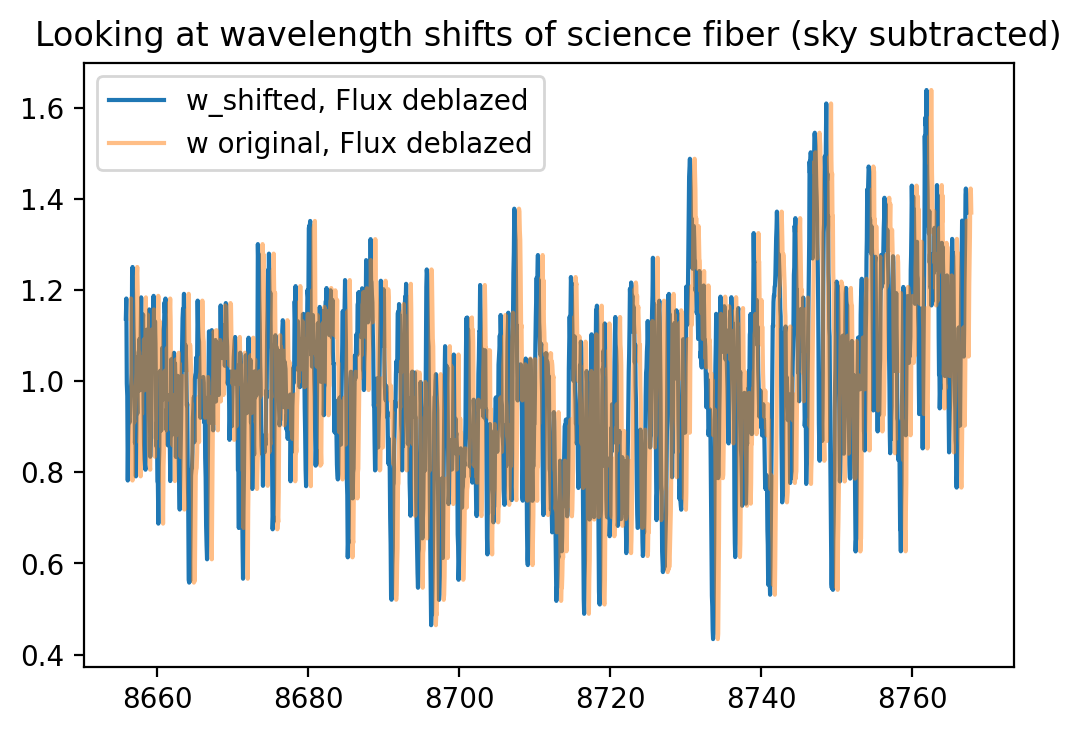

In [8]:
# w measured vs shifted for barycentric movement
o = 5
fig, ax = plt.subplots(dpi=200)
ax.plot(H.w_shifted[o],H.f_debl[o],label='w_shifted, Flux deblazed')
ax.plot(H.w[o],H.f_debl[o],label='w original, Flux deblazed',alpha=0.5)
ax.legend()
ax.set_title('Looking at wavelength shifts of science fiber (sky subtracted)')

### This creates a Target instance within our object

- The config file for the object is by default saved to "../data/target_files/"
- If that file already exist, then it is read. If it does not exist, it queries Simbad
- This way you can change the values within the file if it is already created

In [63]:
# This is used 
H.target

VB_10, ra=289.2400, dec=5.1504, pmra=-598.177, pmdec=-1365.273, rv=29.0000, px=168.9620, epoch=2451545.0

In [64]:
H.target.ra, H.target.dec

(289.24004291666665, 5.150441111111111)

In [65]:
# We can use this to calculate the barycentric velocity in km/s
t = astropy.time.Time("2019-10-08 00:00:00.0",format="iso").jd
H.target.calc_barycentric_velocity(t,obsname='McDonald Observatory')

(2458764.5014283718, -26.231088156769644)

In [66]:
# The barycentric velocity is automatically stored in an attribute
H.berv # km/s

13.684245296677743

## We can plot the spectrum 

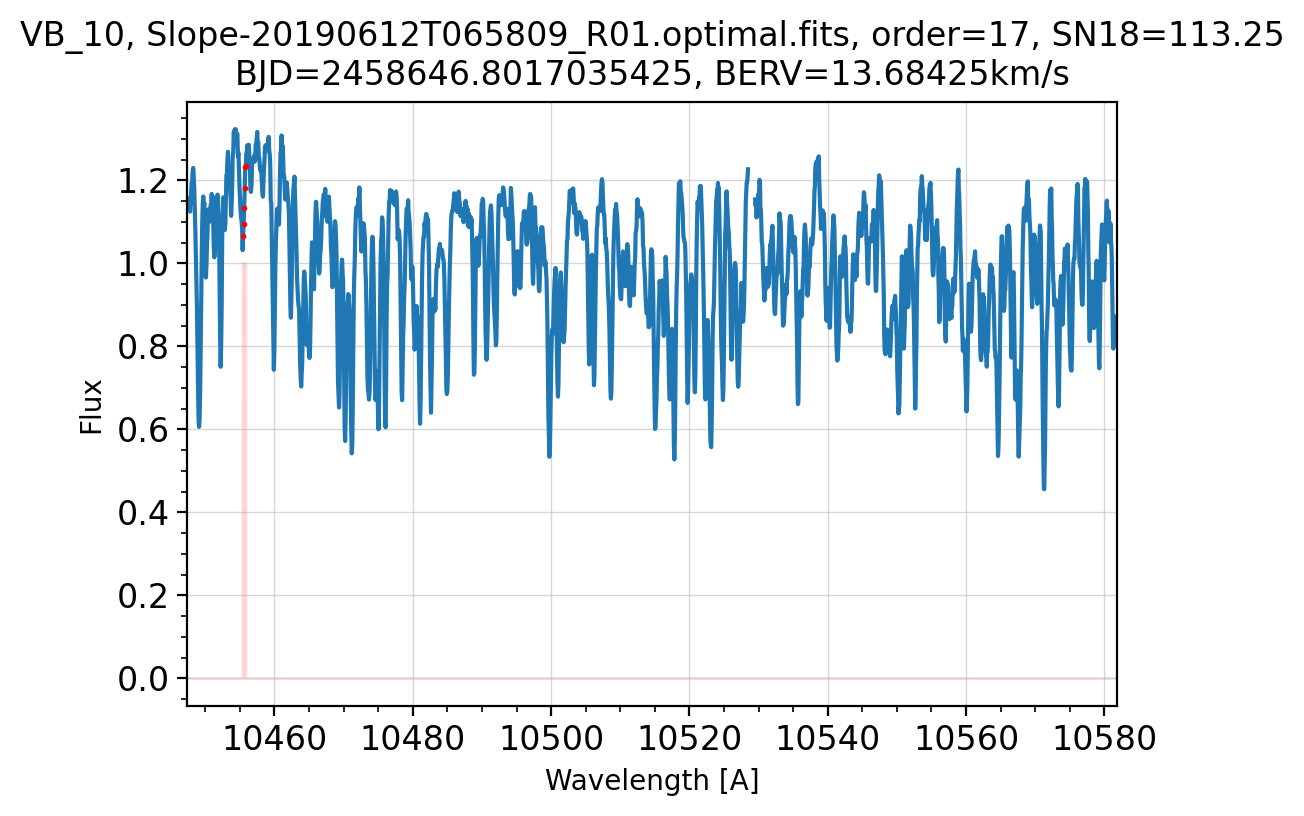

In [67]:
H.plot_order(17,deblazed=True)

Text(0.5, 1.0, 'Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)')

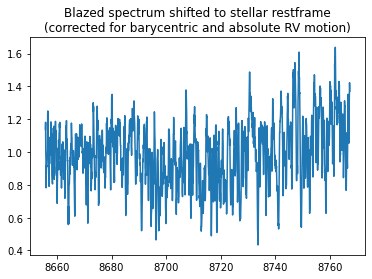

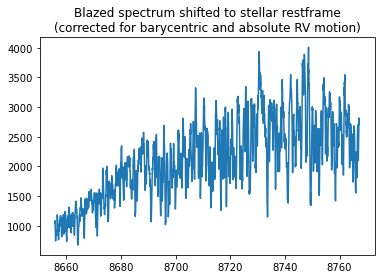

In [68]:
#We could also this this the following way using the handy wavelength and flux attributes
o = 5

# Deblazed
fig, ax = plt.subplots()
ax.plot(H.w_shifted[o],H.f_debl[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

# Blazed
fig, ax = plt.subplots()
ax.plot(H.w_shifted[o],H.f[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

In [69]:
# Other attributes are:
print(H.w_shifted.shape) # shifted wavelength
print(H.w.shape)         # non-shifted original wavelength
print(H.f.shape)         # non-deblazed science flux (sky-subtracted)
print(H.f_debl.shape)    # deblazed science flux (sky-subtracted)
print(H.f_sci.shape)     # Science flux (not sky-subtracted)
print(H.e.shape)         # error for deblazed sky-subtracted science flux
print(H.object)          # Object
print(H.bjd)             # BJD_TDB midpoint
print(H.sn18)            # SNR for order 18
print(H.berv)            # barycentric correction in km/s

(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
VB_10
2458646.8017035425
113.24884
13.684245296677743


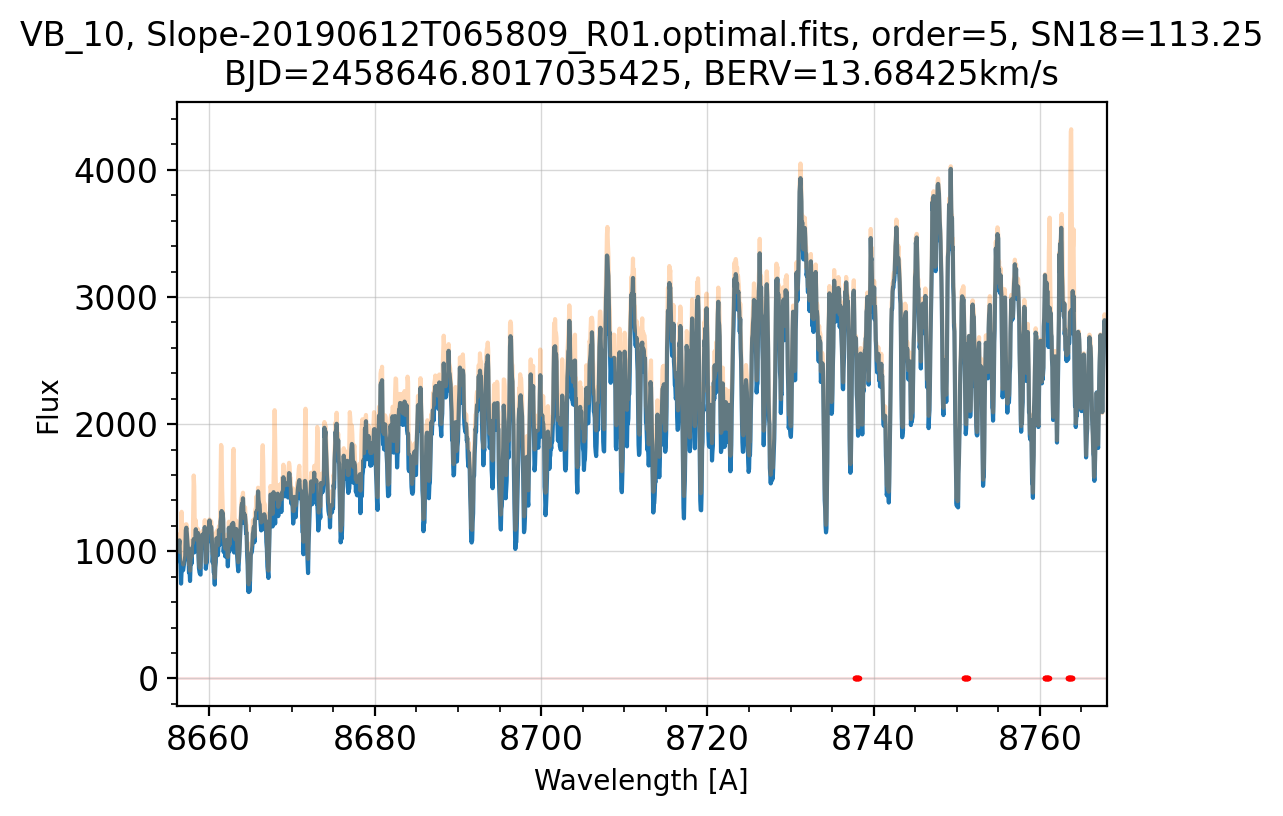

In [70]:
H.plot_order(5,deblazed=False)

# CCFs

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


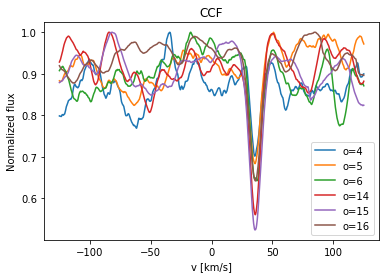

In [71]:
# Lets calculate blazingly fast ccfs for well-behaved orders
v = np.linspace(-125.,125.,1501)
orders = [4,5,6,14,15,16]
ccf = H.calculate_ccf_for_orders(v,orders=orders,plot=True)

In [72]:
# The last row in the CCF is a sum of all of the orders
ccf.shape

(29, 1501)

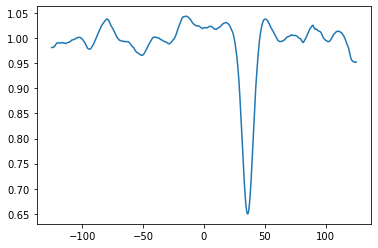

In [73]:
fig, ax = plt.subplots()
ax.plot(v,ccf[28]/np.median(ccf[28]))

# Calculate absolute RVs for orders

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 35.50000km/s
Second iteration: RVabs = 36.11594km/s, sigma=3.44064
First iteration:  RVabs = 35.66667km/s
Second iteration: RVabs = 35.26532km/s, sigma=4.32615
First iteration:  RVabs = 37.16667km/s
Second iteration: RVabs = 36.53296km/s, sigma=4.59460
First iteration:  RVabs = 35.83333km/s
Second iteration: RVabs = 35.46159km/s, sigma=4.56646
First iteration:  RVabs = 35.66667km/s
Second iteration: RVabs = 35.90736km/s, sigma=4.80550
First iteration:  RVabs = 36.00000km/s
Second iteration: RVabs = 35.90072km/s, sigma=4.65199
RVabs it #1: 35.97222+- 0.55625km/s
RVabs it #2: 35.86398+- 0.41524km/s


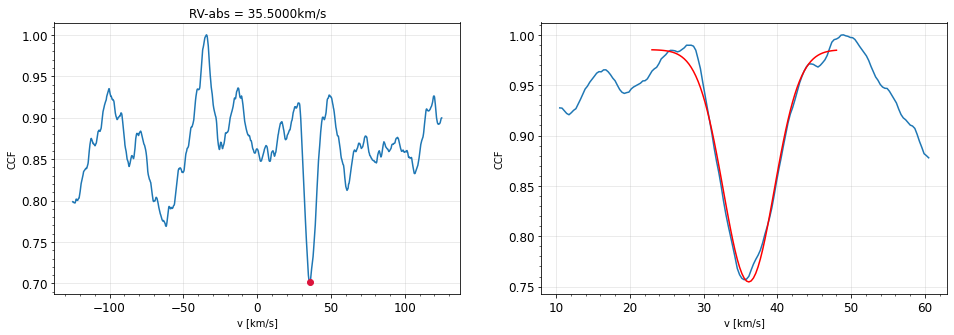

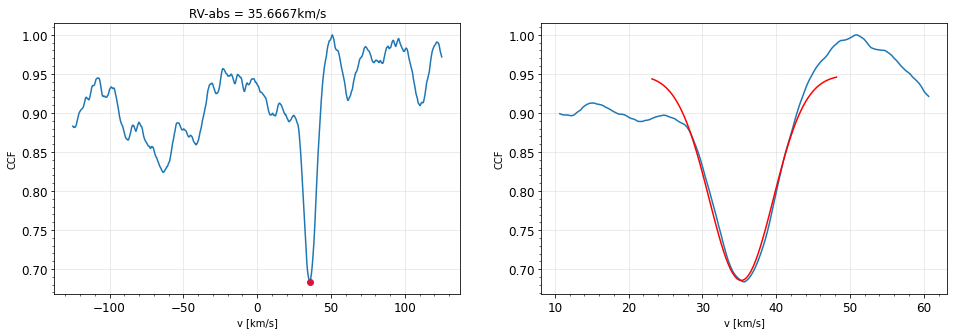

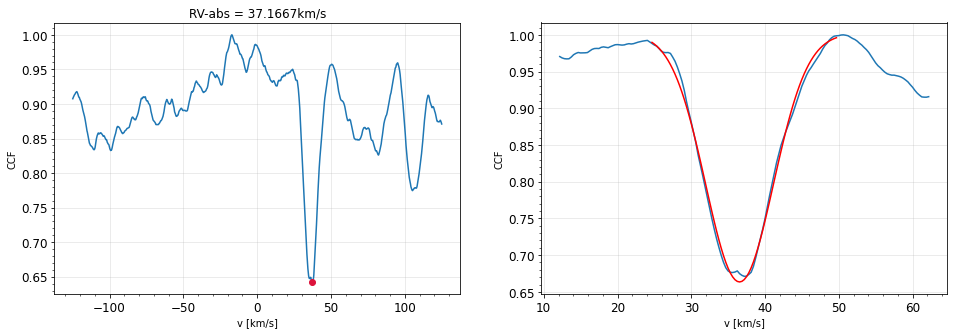

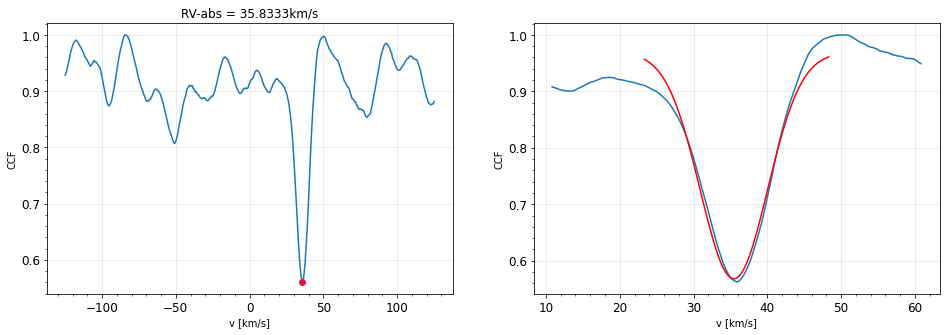

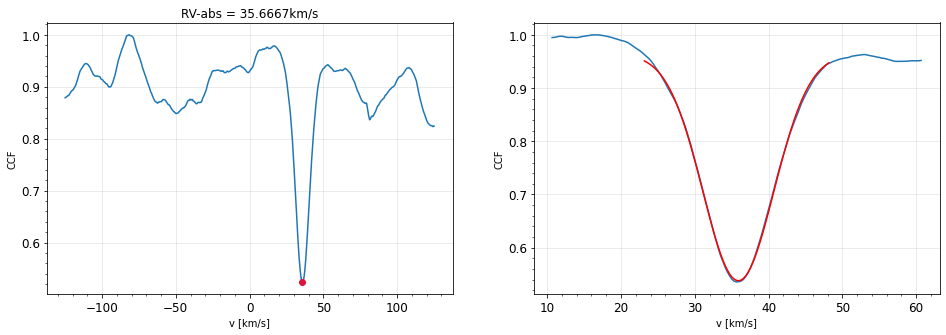

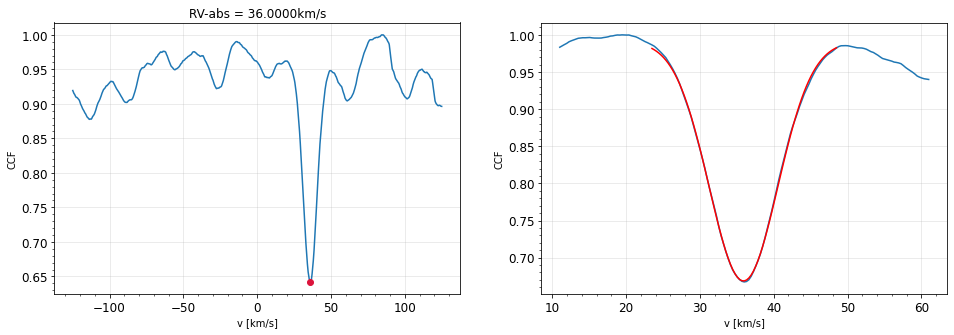

In [74]:
# Calculates on barycentric shifted (not abs RV shifted) and undeblazed version
# rv1 is just the argmin of the CCF, the rv2 is an actual Gaussian fit minimum to the CCF valley
# You can see that order 18 is pretty wonky -- likely tellurics
rv1, rv2 = H.rvabs_for_orders(v,orders,plot=True,verbose=True)

# Working with a collection of spectra

In [75]:
import glob

In [76]:
files = glob.glob("../hpfspec/data/hpf/spectra/*/*.fits")
HS = hpfspec.HPFSpecList(filelist=files)

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.56918km/s, sigma=3.00271
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.56918+- 0.00000km/s
berv=-25.989653949932144,rv=-110.56917930101861
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.59250km/s, sigma=3.01013
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.59250+- 0.00000km/s
berv=-25.998887018907872,rv=-110.59249920891666
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_699.config
Barycentric sh

In [22]:
HS.df

,OBJECT_ID,filename,exptime,sn18,qprog,rv
0,GJ_699,../hpfspec/data/hpf/spectra/GJ_699/Slope-20181...,330.15,757.786011,ENG18-3-003,-110.569179
1,GJ_699,../hpfspec/data/hpf/spectra/GJ_699/Slope-20181...,330.15,764.023743,ENG18-3-003,-110.592499
2,GJ_699,../hpfspec/data/hpf/spectra/GJ_699/Slope-20190...,191.70,516.742920,ENG19-1-003,-110.585828
3,GJ_273,../hpfspec/data/hpf/spectra/GJ_273/Slope-20180...,319.50,525.697876,NaN,16.510382
4,VB_10,../hpfspec/data/hpf/spectra/VB_10/Slope-201906...,969.15,113.248840,HET19-2-300,35.265323


In [23]:
HS.sn18

[757.786, 764.02374, 516.7429, 525.6979, 113.24884]

In [24]:
HS.objects

['GJ_699', 'GJ_699', 'GJ_699', 'GJ_273', 'VB_10']